In [25]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image

In [26]:
plt.style.use('ggplot')

# Outline
1. Take a look ata daata
2. Extract text from images:
    pytessarect
    easyocr
    keras_ocr


In [27]:
import pandas as pd

# Try using pyarrow engine

# Or try using fastparquet engine
annot = pd.read_parquet('annot.parquet', engine='fastparquet')
annot.head()

id          image_id                           bbox  \
0  a4ea732cd3d5948a_1  a4ea732cd3d5948a   [525.83, 3.4, 197.64, 33.94]   
1  a4ea732cd3d5948a_2  a4ea732cd3d5948a  [534.67, 64.68, 91.22, 38.19]   
2  a4ea732cd3d5948a_3  a4ea732cd3d5948a  [626.95, 63.62, 96.52, 31.82]   
3  a4ea732cd3d5948a_4  a4ea732cd3d5948a  [577.4, 141.87, 147.13, 43.1]   
4  a4ea732cd3d5948a_5  a4ea732cd3d5948a  [391.03, 163.9, 60.82, 38.65]   

   utf8_string                                             points     area  
0  Performance  [525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...  6707.90  
1        Sport  [535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...  3483.69  
2        Watch  [626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...  3071.27  
3   ...period.  [580.02, 143.61, 724.53, 141.87, 723.66, 184.9...  6341.30  
4            .  [395.2, 163.9, 451.85, 191.94, 445.59, 202.55,...  2350.69

In [28]:
imgs=pd.read_parquet('img.parquet', engine='fastparquet')
img_nfs=glob('train_val_images/train_images/*')

# Plot example Images

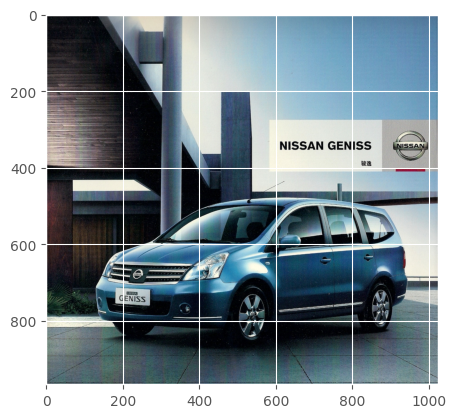

In [5]:
plt.imshow(plt.imread(img_nfs[6]))

In [6]:
image_id=img_nfs[6].split("\\")[1].split(".")[0]
annot.query("image_id == @image_id")

id          image_id                             bbox  \
528078  0001c6bf48e16ab2_1  0001c6bf48e16ab2   [605.88, 326.58, 126.68, 33.3]   
528079  0001c6bf48e16ab2_2  0001c6bf48e16ab2  [733.87, 327.89, 122.76, 33.95]   
528080  0001c6bf48e16ab2_3  0001c6bf48e16ab2   [817.45, 379.47, 38.53, 22.21]   
528081  0001c6bf48e16ab2_4  0001c6bf48e16ab2    [909.52, 333.76, 87.5, 24.17]   
528082  0001c6bf48e16ab2_5  0001c6bf48e16ab2   [209.84, 724.51, 28.95, 10.14]   
528083  0001c6bf48e16ab2_6  0001c6bf48e16ab2   [188.06, 731.68, 74.98, 22.77]   
528084  0001c6bf48e16ab2_7  0001c6bf48e16ab2     [226.5, 675.67, 25.98, 8.16]   

       utf8_string                                             points     area  
528078      NISSAN  [605.88, 329.19, 731.91, 326.58, 732.56, 358.5...  4218.44  
528079      GENISS  [733.87, 328.54, 854.67, 327.89, 856.63, 360.5...  4167.70  
528080           .  [817.45, 379.47, 852.06, 380.13, 855.98, 401.6...   855.75  
528081      NISSAN  [909.52, 334.42, 996.37, 333.76, 997.02, 357.9...  2114.88  
528082      LIVINA  [210.83, 724.51, 238.79, 725.74, 238.54, 734.6...   293.55  
528083      GENISS  [189.79, 731.68, 263.04, 735.64, 262.79, 754.4...  1707.29  
528084      NISSAN  [227.24, 675.67, 252.48, 676.16, 251.98, 683.8...   212.00

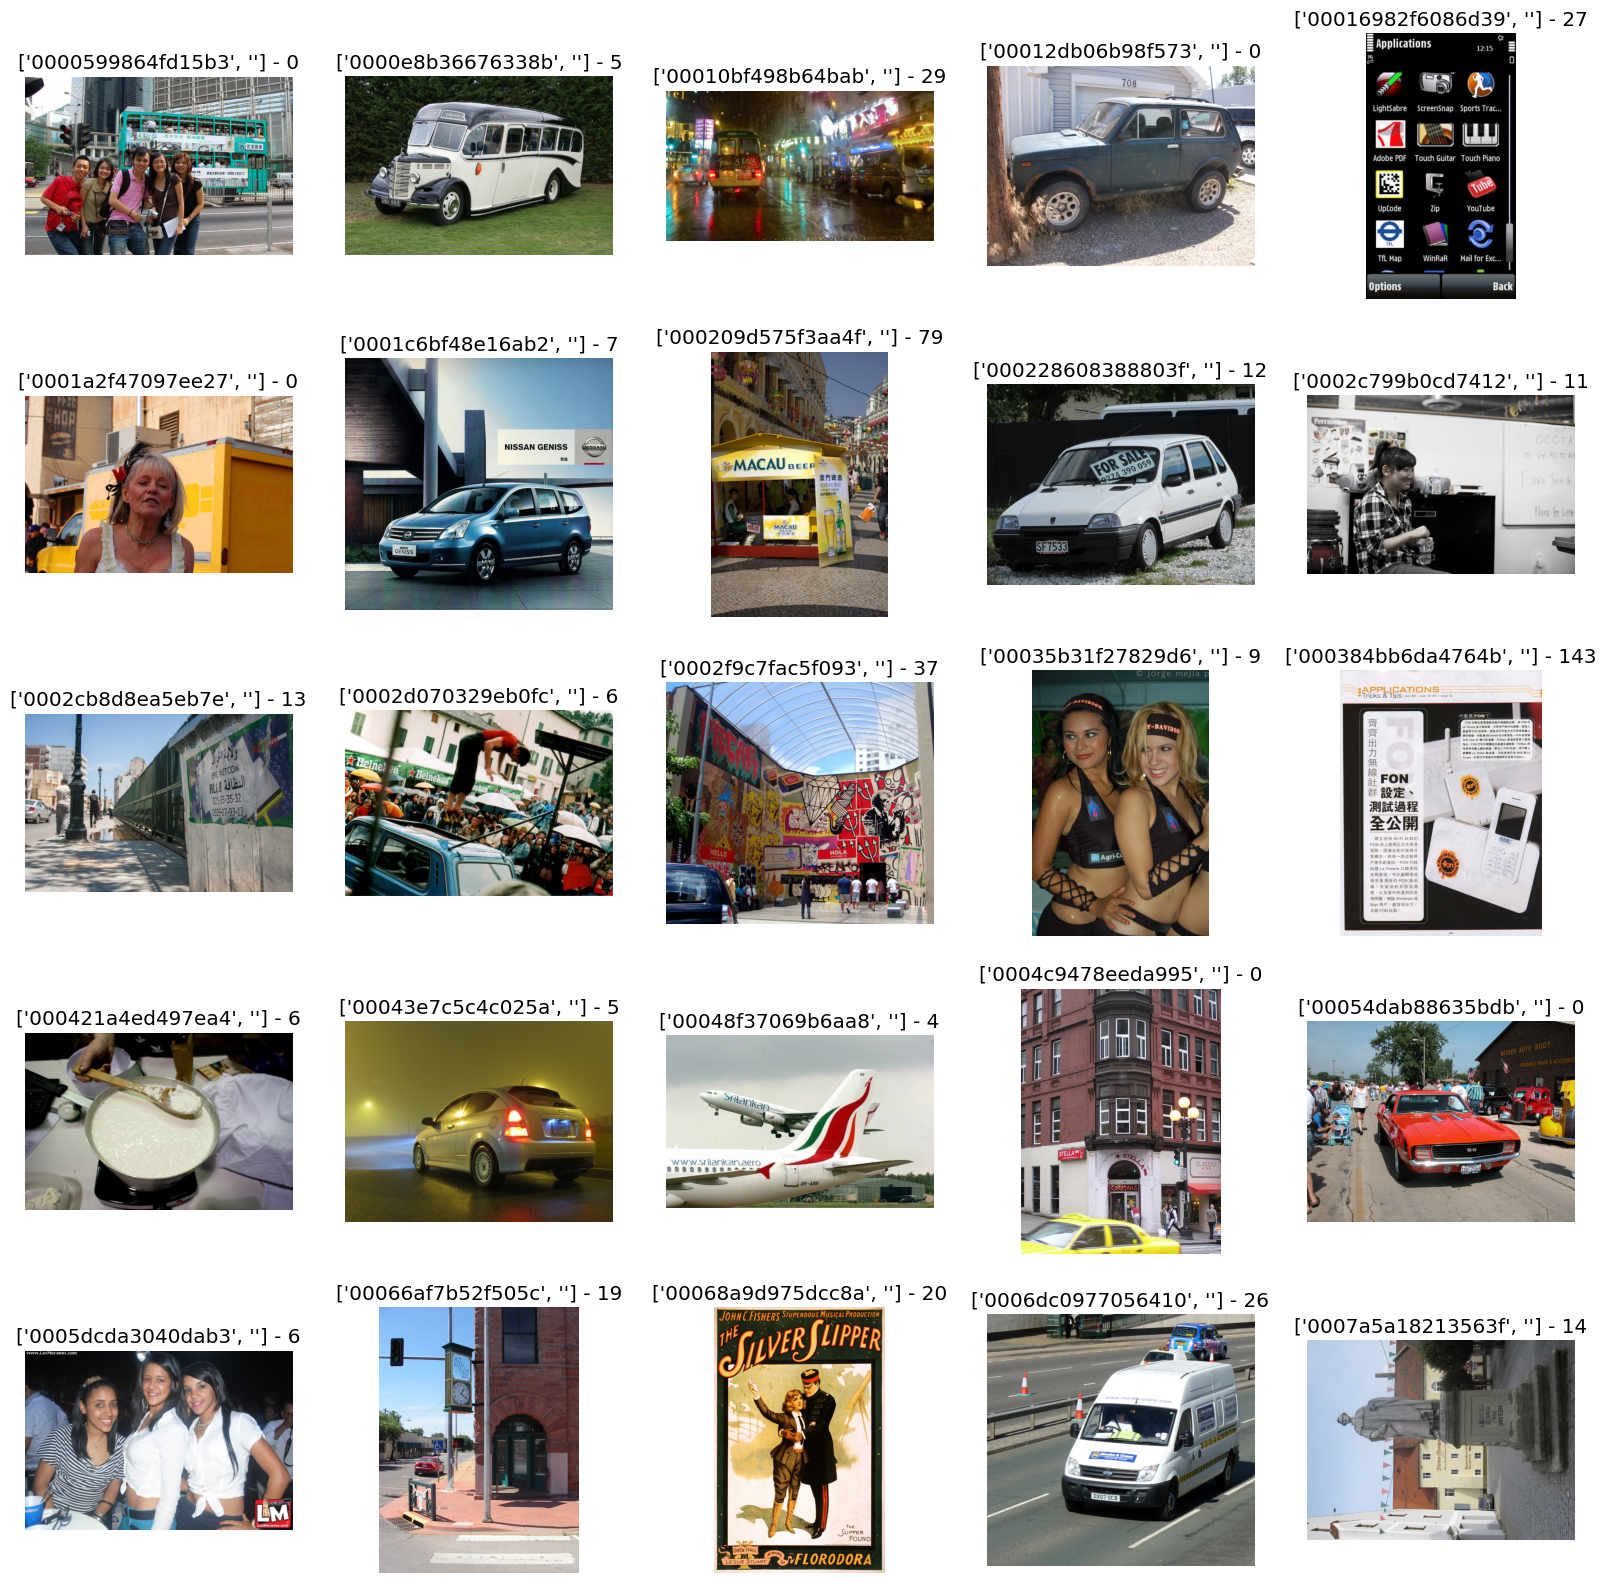

In [7]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
axs = axs.flatten()
for i in range(25):
    axs[i].imshow(plt.imread(img_nfs[i]))
    axs[i].axis('off')
    image_id = img_nfs[i].split("\\")[1].rsplit(".jpg")
    n_annot = len(annot.query('image_id == @image_id'))
    axs[i].set_title(f'{image_id} - {n_annot}')
plt.show()

# Method-1 : pytessarect

In [10]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
img_file='statement.jpg'

In [14]:
print(pytesseract.image_to_string(img_file, lang='eng'))

SHEET 64

7 53853261 ‘we =n account with vw
a CU LOT IER AED UARD National Westminster Bank Limited
ROBINSON ESQ.
1980 BRISTOL CITY OFFICE
Date Details Debits Credits Balance
30JUN | Balance Forward 2,157.93 YW
1JUL 069568“ 11.92
069569 30.00
WARD & KRUGER so 10.00
WARD & KRUGER so 37.00
G M ROBINSON STTLT TR 100.00 2,146.85 %
2JUL] 069570/7 14.15 2,161.00 %
3JUL 0695717 9.20
BRISTOL & WEST B/S SO 50.00
TSTS GM ROBINSON ~ 100.00 2,120.20 %
4JUL 069572|7 11.20 2,131.40 %
8JUL 069573 10.00 2,141.40 %
9JUL 069563 35.12
069575 229.23
069577. 21.16
069579 7.15
069581 24.05 2.455.469 %
10JUL 069574 23.00
069580 25.00 2,504.69 Y
11JUL 029623 15.00 2,519.69 Y%
17JUL 069582 20.00 2,539.69 Y%
18JUL 029649 13.20
029650 24.00
069576 126.08
069588 30.00 2,732.97 %
21JUL 069586 20731
NTB BERMUDA 955.05 1,799.23 Y%
22JUL 069584 | 40.00
069585 4.85
069539 9.75 1,853.83 Y%
23JUL 0695904 13.00 1,866.83 %

er DV Dividend TR Transter 0 Di
St er

‘ CDC: Dens
Abbreviations pp pirect Debit ding Order Over

w

# Method 2 EasyOCR

In [32]:
import easyocr

In [17]:
reader = easyocr.Reader(['en'],gpu=False)

Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [18]:
reader_1 = easyocr.Reader(['en'],gpu=True)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [19]:
result=reader.readtext(img_file)
result

[([[873, 105], [917, 105], [917, 145], [873, 145]], '', 0.0),
 ([[248, 134], [360, 134], [360, 158], [248, 158]],
  '53853261',
  0.9929073703563684),
 ([[682, 140], [860, 140], [860, 166], [682, 166]],
  'In account with',
  0.9887536040129781),
 ([[972, 132], [1046, 132], [1046, 156], [972, 156]],
  'SHEET',
  0.9208142089869084),
 ([[1082, 132], [1114, 132], [1114, 156], [1082, 156]],
  '6 4',
  0.721384563777805),
 ([[246, 160], [402, 160], [402, 186], [246, 186]],
  'CHRISTOPHER',
  0.9949430755242799),
 ([[412, 160], [500, 160], [500, 186], [412, 186]],
  'EDWARD',
  0.9998765301366023),
 ([[684, 168], [1118, 168], [1118, 198], [684, 198]],
  'National Westminster Bank Limited',
  0.9167122682456704),
 ([[384, 188], [498, 188], [498, 214], [384, 214]],
  'ROBINSON',
  0.8906900516601441),
 ([[508, 188], [558, 188], [558, 212], [508, 212]],
  'ESQ _',
  0.8196511865648096),
 ([[96, 272], [156, 272], [156, 296], [96, 296]], '1980', 0.9998902082443237),
 ([[684, 268], [784, 268], [7

In [31]:
pd.DataFrame(result, columns=['bbox','text','conf'])

NameError: name 'result' is not defined

# Method 3 Keras OCR

In [1]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()



Looking for C:\Users\Admin\.keras-ocr\craft_mlt_25k.h5

Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.

Looking for C:\Users\Admin\.keras-ocr\crnn_kurapan.h5


In [5]:
results=pipeline.recognize([img_file])

7/7 [==============================] - 23s 3s/step


In [9]:
import pandas as pd
df=pd.DataFrame(results[0], columns = ['text','bbox'])

In [12]:
df['text'][0:50]

0             aan
1           sheet
2              64
3        53853261
4            with
5              in
6         account
7     christopher
8          edward
9         limited
10       national
11    westminster
12           bank
13       robinson
14            esq
15        bristol
16           city
17         office
18           1580
19         debits
20        credits
21        balance
22           date
23        details
24        2015747
25            old
26          zojun
27        balance
28        forward
29             92
30         064568
31             11
32           ijul
33         064569
34             50
35             00
36             00
37           ward
38         kruger
39             so
40             10
41              x
42           ward
43         kruger
44             so
45             37
46             00
47              4
48        2414685
49             od
Name: text, dtype: object

In [14]:
import matplotlib.pyplot as plt

<Axes: >

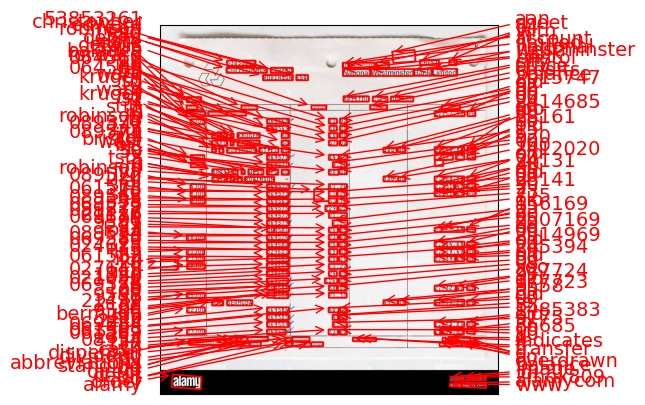

In [20]:
keras_ocr.tools.drawAnnotations(plt.imread(img_file), results[0])

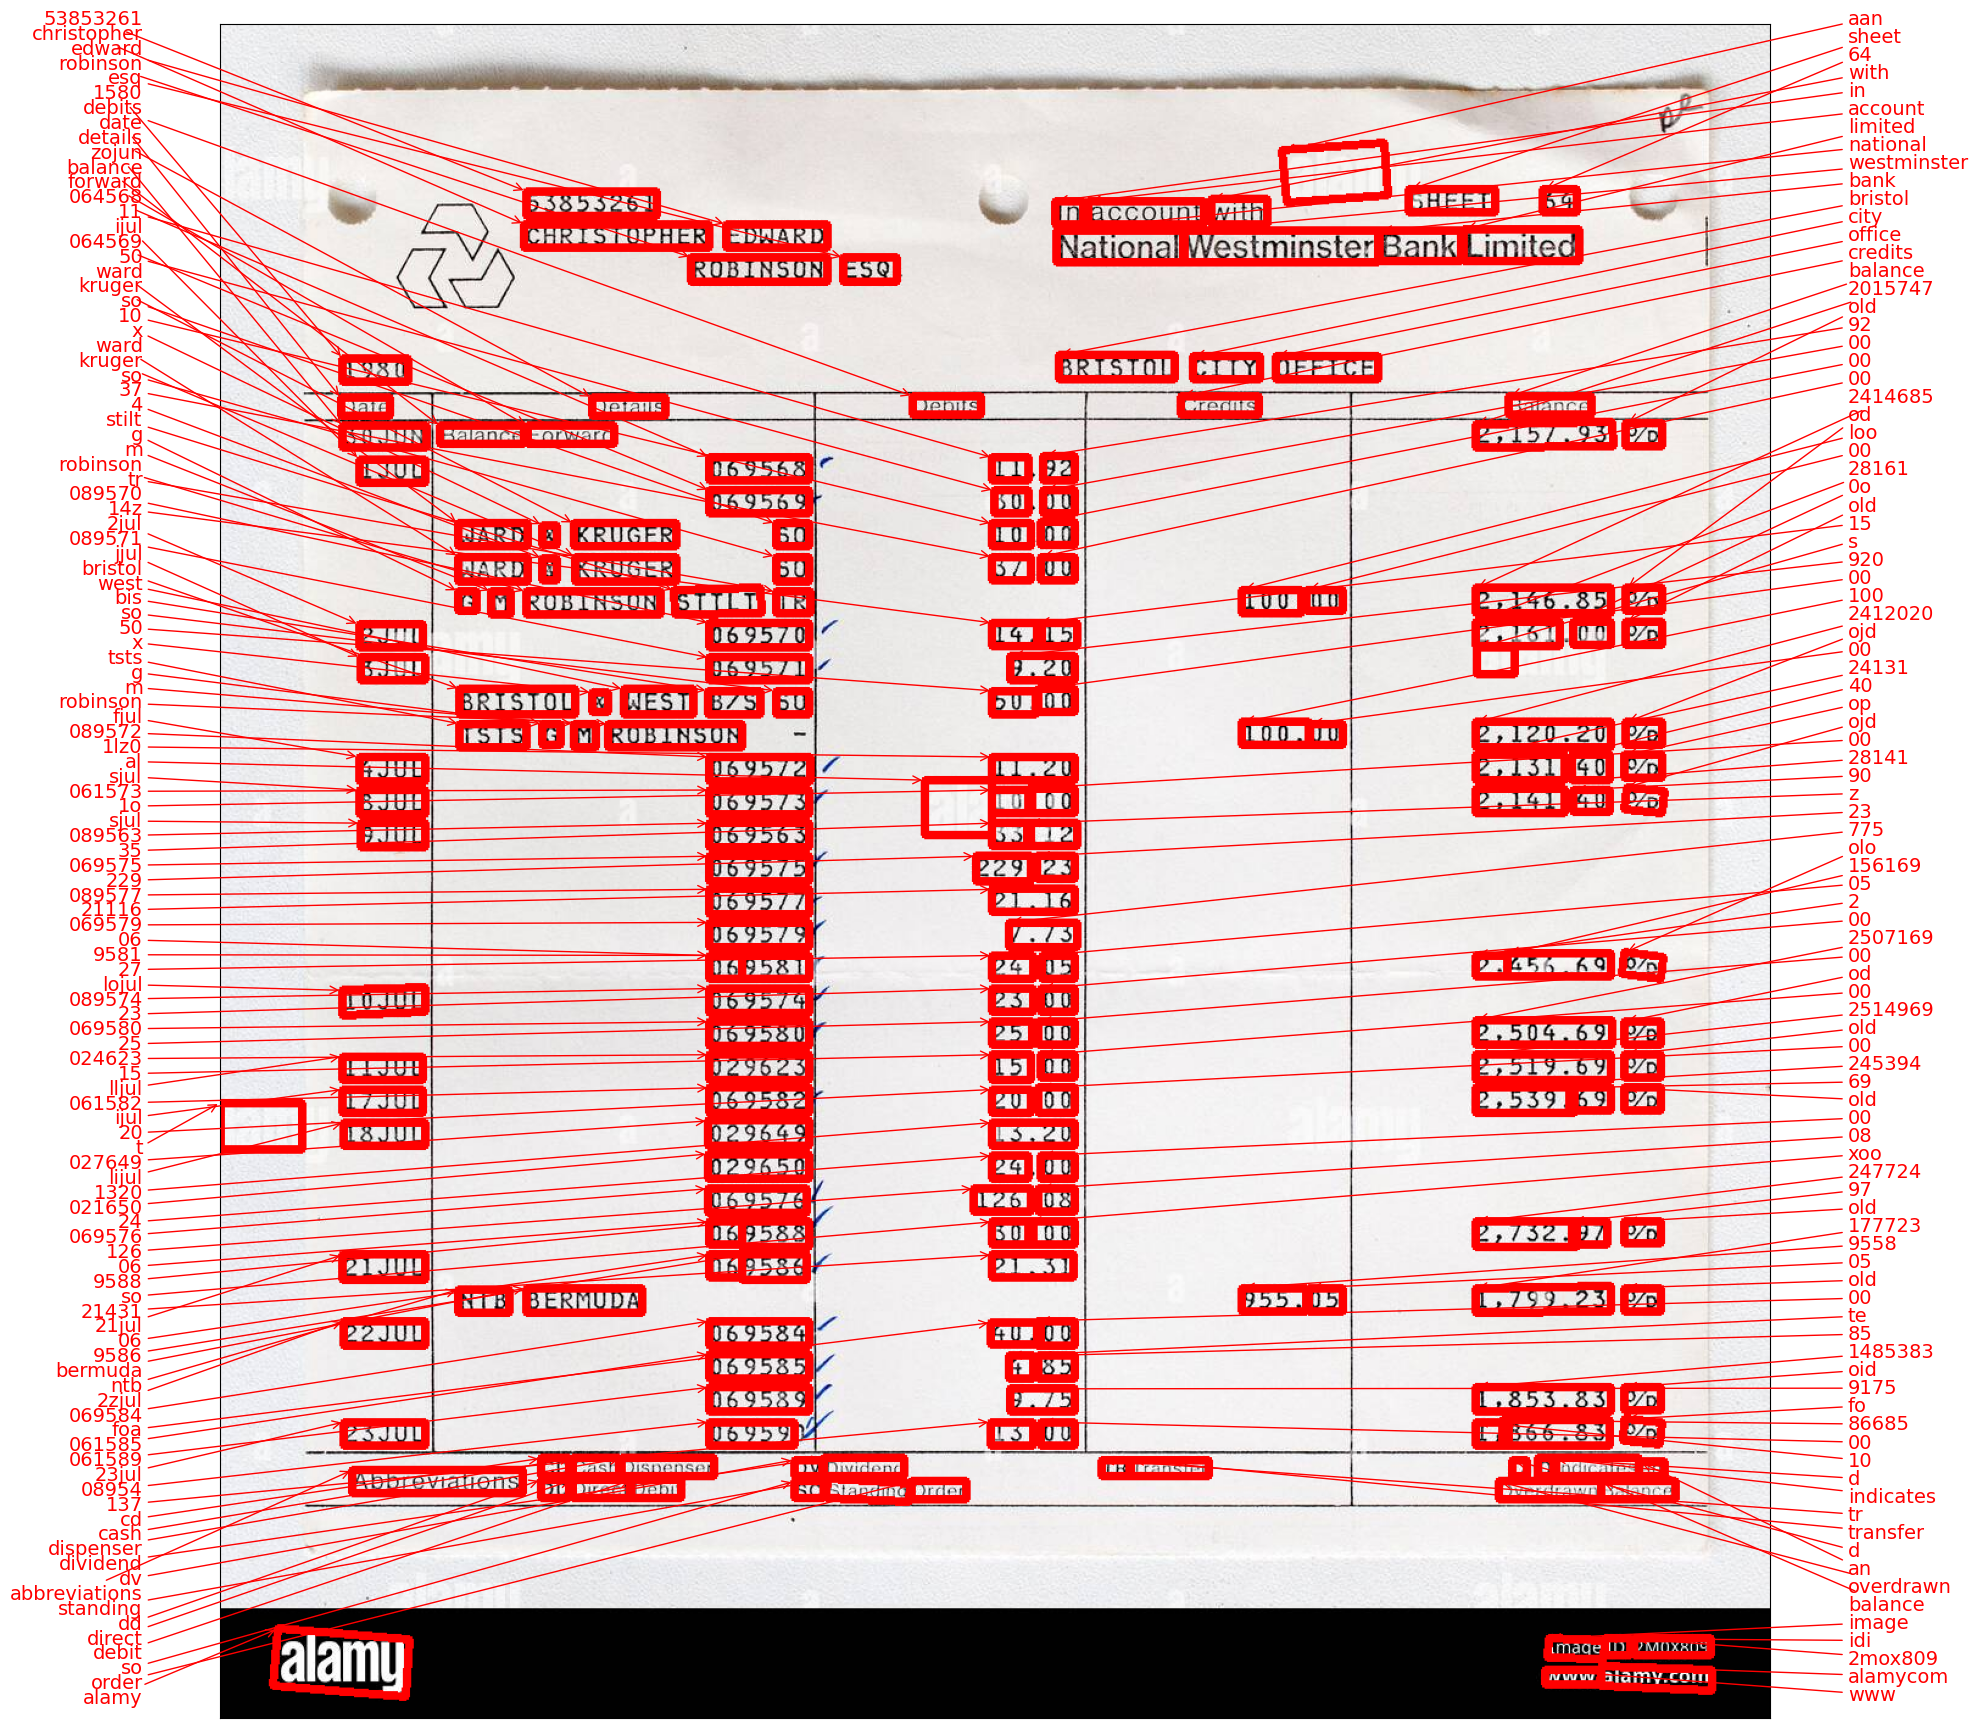

In [24]:
import matplotlib.pyplot as plt
import keras_ocr

# Assume img_file is the path to your image and results contains your OCR results

# Load the image
image = plt.imread(img_file)

# Create a figure with a specified size
fig, ax = plt.subplots(figsize=(20, 30))  # Adjust figsize as needed

# Draw annotations on the image
keras_ocr.tools.drawAnnotations(image=image, predictions=results[0], ax=ax)

# Show the plot
plt.show()


# Compare easycor vs keras ocr

In [44]:
# EasyOCR
reader = easyocr.Reader(['en'], gpu=False)

dfs=[]
for img in tqdm(img_nfs[:25]):
    result = reader.readtext(img)
    img_id = img.split("\\")[-1].rsplit(".jpg")[0]
    img_df = pd.DataFrame(result, columns = ['bbox','text','conf'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
easyocr_df = pd.concat(dfs)


Using CPU. Note: This module is much faster with a GPU.


  0%|          | 0/25 [00:00<?, ?it/s]

In [45]:
easyocr_df.reset_index(drop=True,inplace=True)
easyocr_df

bbox                   text  \
0     [[585, 223], [607, 223], [607, 237], [585, 237]]                      4   
1     [[842, 254], [910, 254], [910, 280], [842, 280]]                   8400   
2     [[635, 353], [675, 353], [675, 371], [635, 371]]                  om.hk   
3     [[691, 357], [839, 357], [839, 377], [691, 377]]  aebekae : 2926 7222 =   
4     [[135, 461], [215, 461], [215, 503], [135, 503]]              IdBu eeg1   
..                                                 ...                    ...   
202  [[509.17239411139764, 532.1792670450748], [562...                    @ne   
203  [[451.53425356716735, 541.115081777618], [537....          Ioooonouotocd   
204   [[649, 241], [759, 241], [759, 349], [649, 349]]                      3   
205   [[492, 380], [516, 380], [516, 508], [492, 508]]                      1   
206   [[600, 408], [630, 408], [630, 504], [600, 504]]                      K   

         conf            img_id  
0    0.483369  0000599864fd15b3  
1    0.070386  0000599864fd15b3  
2    0.985814  0000599864fd15b3  
3    0.058865  0000599864fd15b3  
4    0.134325  0000e8b36676338b  
..        ...               ...  
202  0.149766  0006dc0977056410  
203  0.001343  0006dc0977056410  
204  0.475753  0007a5a18213563f  
205  0.344312  0007a5a18213563f  
206  0.233526  0007a5a18213563f  

[207 rows x 4 columns]

In [47]:
pipeline = keras_ocr.pipeline.Pipeline()
results = pipeline.recognize(img_nfs[:10])

Looking for C:\Users\Admin\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\Admin\.keras-ocr\crnn_kurapan.h5


ResourceExhaustedError: Graph execution error:

Detected at node model_15/basenet.slice1.0/BiasAdd defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "D:\Lenditt\OCR\venv\Lib\asyncio\base_events.py", line 604, in run_forever

  File "D:\Lenditt\OCR\venv\Lib\asyncio\base_events.py", line 1909, in _run_once

  File "D:\Lenditt\OCR\venv\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_15340\4146831140.py", line 2, in <module>

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras_ocr\pipeline.py", line 62, in recognize

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras_ocr\detection.py", line 779, in detect

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\engine\training.py", line 2655, in predict

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "D:\Lenditt\OCR\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 311, in call

OOM when allocating tensor with shape[10,2048,2048,64] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node model_15/basenet.slice1.0/BiasAdd}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_19480]